In [153]:
import numpy as np
from PIL import Image, ImageOps
import torch
import torch.nn as nn
from scipy.stats import multivariate_normal
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.datasets import load_digits

In [154]:
#create dataset
N = 1000
N_train = int(N*0.9) #use 90% for training
N_test = N - N_train #rest for testing
x, y = make_moons(n_samples=N, noise=0.2,random_state=0)
#split into train and test set
xtrain, ytrain = x[:N_train,...], y[:N_train,...]
xtest, ytest = x[N_train:,...], y[N_train:,...]

In [155]:
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, x, y):
        #fit routine
        self.x = x
        self.y = y

    def kneighbours(self, q):  
        #return nearest neighbour indices and distances using euclidean
        distances = np.linalg.norm(self.x - q,axis=1)
        indices = np.argsort(distances)[:self.k]
        # Extract distances and indices of the k nearest elements
        distances = distances[indices]

        return indices, distances
    
    def predict(self, q):
        #prediction function
        indices, distances = self.kneighbours(q)
        count_classes_in_neighbors = np.bincount(self.y[indices])
        prediction = np.argmax(count_classes_in_neighbors)

        return prediction

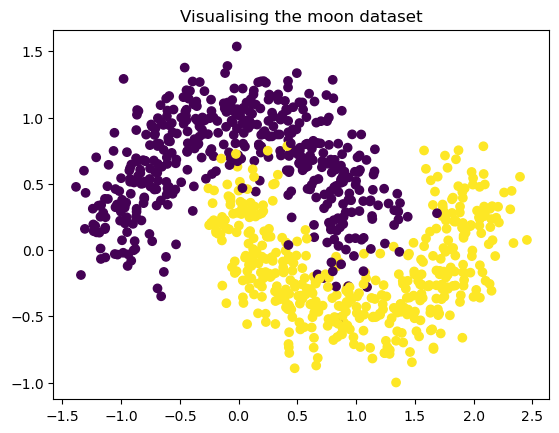

In [156]:
#Task 1.1 
plt.scatter(xtrain[:,0],xtrain[:,1],c=ytrain)
plt.title('Visualising the moon dataset')
plt.show()

In [157]:
#Task 1.4

#My Knn        
knn = KNN(5)
knn.fit(xtrain,ytrain)
sample = np.array(xtrain[1])
sample = sample.reshape(1,-1)
print('My KNN prediction:',knn.predict(sample))

#Sklearn knn 
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(xtrain, ytrain)
sample = np.array(xtrain[1])
sample = sample.reshape(1, -1)
print('Sklearn KNN prediction:', neigh.predict(sample))

#Task 1.5
for i in range (10):
    knn = KNN(2**i)
    knn.fit(xtrain,ytrain)
    text = 'Prediction with k = 2^' + str(i) + ' for q=xtrain[1]:' + str(knn.predict(xtrain[1]))
    print(text)

My KNN prediction: 1
Sklearn KNN prediction: [1]
Prediction with k = 2^0 for q=xtrain[1]:1
Prediction with k = 2^1 for q=xtrain[1]:1
Prediction with k = 2^2 for q=xtrain[1]:1
Prediction with k = 2^3 for q=xtrain[1]:1
Prediction with k = 2^4 for q=xtrain[1]:1
Prediction with k = 2^5 for q=xtrain[1]:1
Prediction with k = 2^6 for q=xtrain[1]:1
Prediction with k = 2^7 for q=xtrain[1]:1
Prediction with k = 2^8 for q=xtrain[1]:1
Prediction with k = 2^9 for q=xtrain[1]:1


In [158]:
#Task 2

In [159]:
def make_data(noise=0.2, outlier=1):
    prng = np.random.RandomState(0)
    n = 500

    x0 = np.array([0, 0])[None, :] + noise * prng.randn(n, 2)
    y0 = np.ones(n)
    x1 = np.array([1, 1])[None, :] + noise * prng.randn(n, 2)
    y1 = -1 * np.ones(n)

    x = np.concatenate([x0, x1])
    y = np.concatenate([y0, y1]).astype(np.int32)

    xtrain, xtest, ytrain, ytest = train_test_split(
        x, y, test_size=0.1, shuffle=True, random_state=0
    )
    xplot, yplot = xtrain, ytrain

    outlier = outlier * np.array([1, 1.75])[None, :]
    youtlier = np.array([-1])
    xtrain = np.concatenate([xtrain, outlier])
    ytrain = np.concatenate([ytrain, youtlier])
    return xtrain, xtest, ytrain, ytest, xplot, yplot

In [160]:
class LinearLeastSquares:
    def fit(self, x, y):
        #fit routine
        # add extra 1s for bias
        self.x = np.hstack([x, np.ones((x.shape[0], 1))])
        self.y = y
        # formula in the slides, find optimal weights in 1 step (closed form solution)
        self.weights = np.linalg.inv(self.x.T @ self.x) @ self.x.T @ self.y
        return self.weights

    def predict(self, x):
        # Augment feature matrix with a column of ones for the bias term
        x = np.hstack([x, np.ones((x.shape[0], 1))])
        
        # Compute predictions
        predictions = x @ self.weights
        return np.sign(predictions)

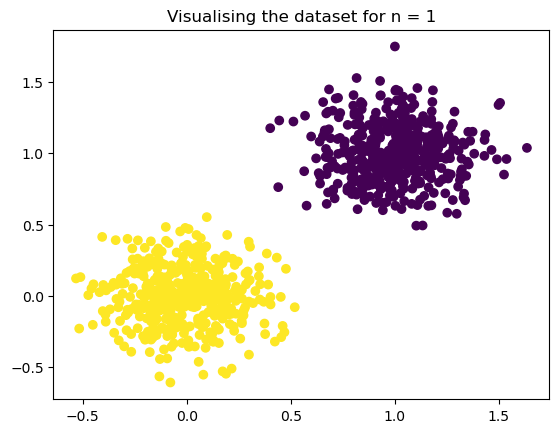

Accuracy on test set: 100.0%


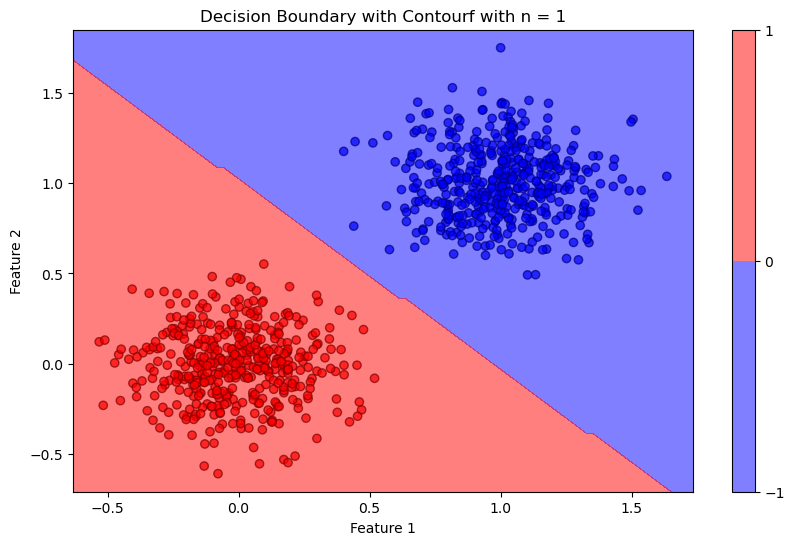

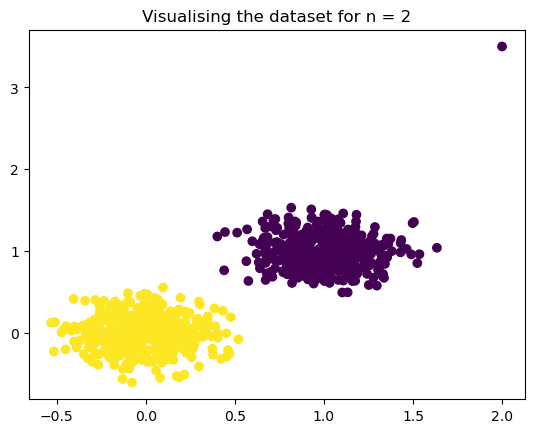

Accuracy on test set: 100.0%


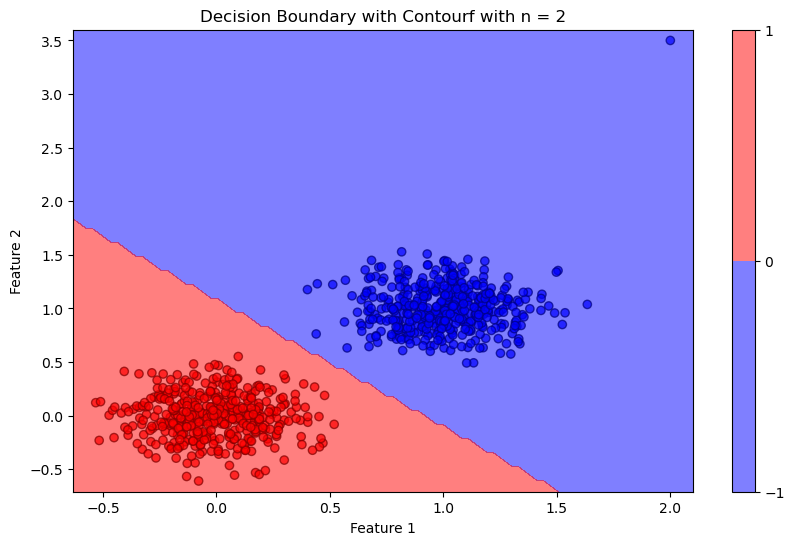

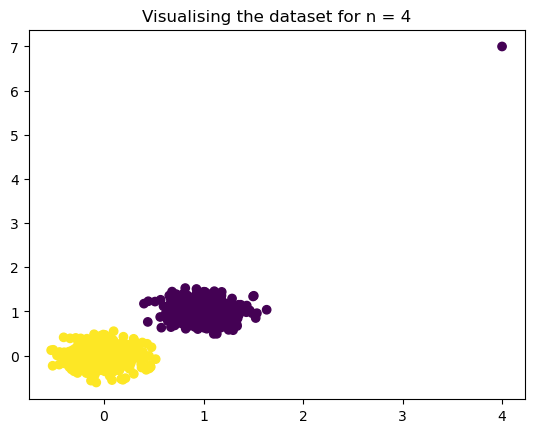

Accuracy on test set: 100.0%


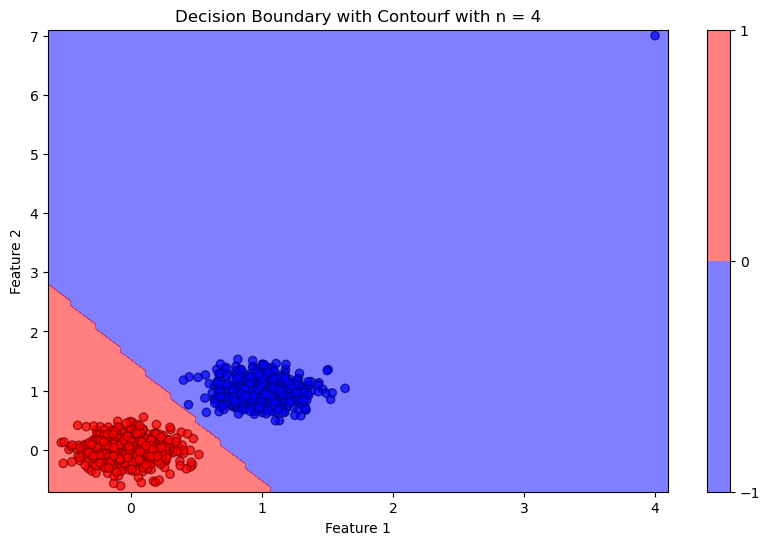

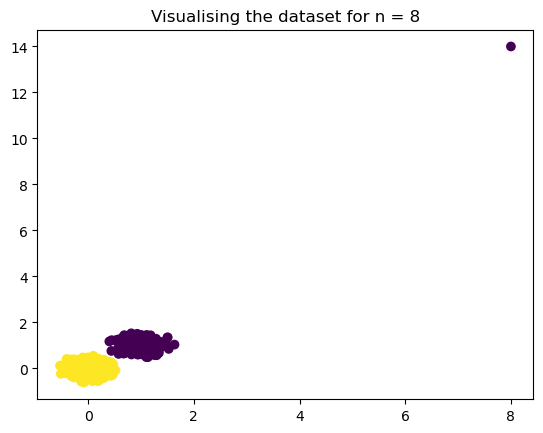

Accuracy on test set: 98.0%


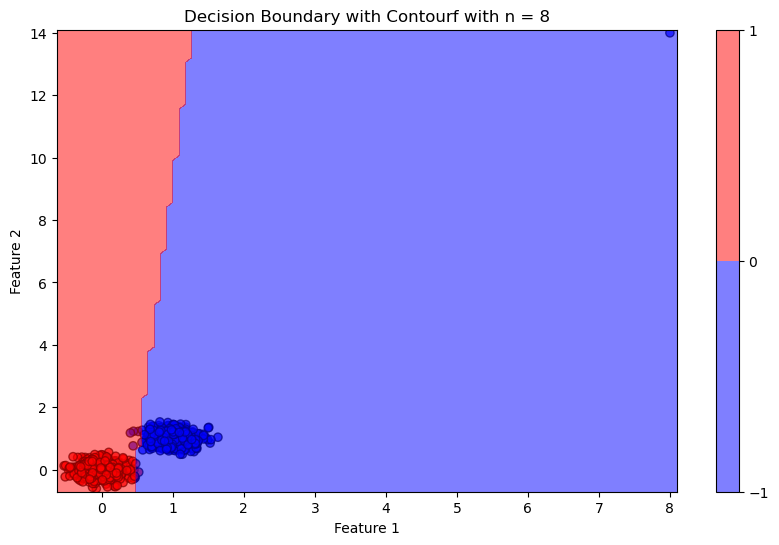

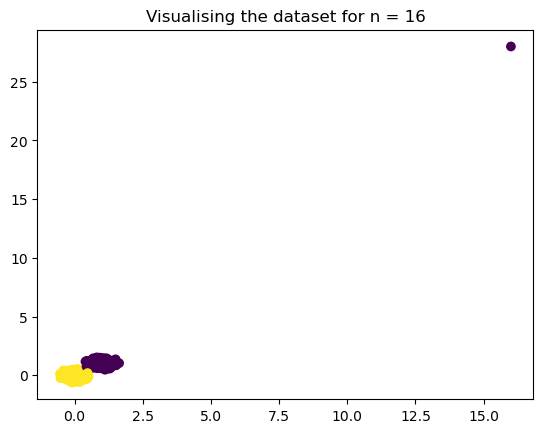

Accuracy on test set: 93.0%


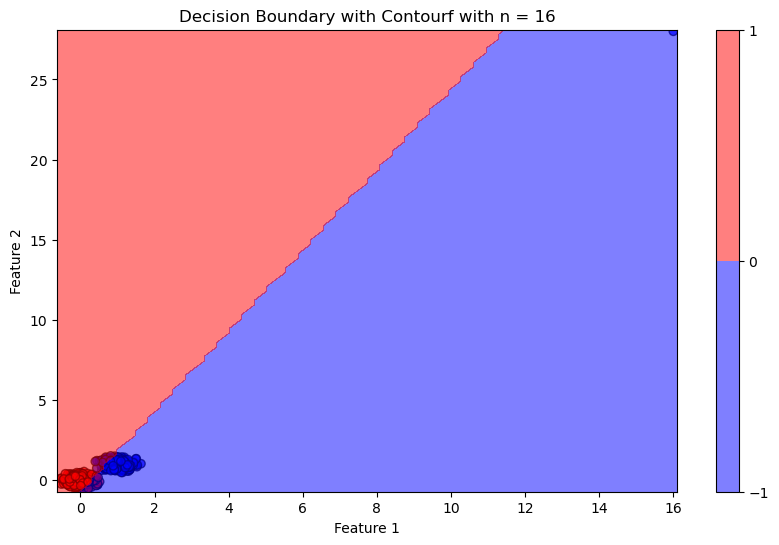

In [161]:
for i in range(5):
    n = 2**i

    xtrain, xtest, ytrain, ytest, xplot, yplot = make_data(outlier = n )
        
    plt.scatter(xtrain[:,0],xtrain[:,1],c=ytrain)
    title = 'Visualising the dataset for n = ' + str(n)
    plt.title(title)
    plt.show()
    
    x_min, x_max = xtrain[:, 0].min() - 0.1, xtrain[:, 0].max() + 0.1 # feature 1
    x_min_2, x_max_2 = xtrain[:, 1].min() - 0.1, xtrain[:, 1].max() + 0.1 # feature 2
    
    #creating meshgrid with 100x100 dim
    x_one, x_two = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(x_min_2, x_max_2, 100))
    
    least_squares = LinearLeastSquares()
    least_squares.fit(xtrain,ytrain)

    y_prediction = least_squares.predict(xtest)
    y_prediction = np.where(y_prediction>=0,1,-1)
    acc = np.mean(y_prediction==ytest)
    print(f"Accuracy on test set: {acc*100}%")
    
    # ravel with shape (10000,2) for input to least squares
    grid = np.c_[x_one.ravel(), x_two.ravel()] 
    
    z = least_squares.predict(grid)
    z = z.reshape(x_one.shape)
    
    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ytrain, cmap=plt.cm.bwr, edgecolor='k', alpha=0.7)
        
    plt.contourf(x_one, x_two, z, levels=[z.min(), 0, z.max()], alpha=0.5, linestyles=['--'], colors=['blue', 'red'])
    plt.colorbar()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    title = 'Decision Boundary with Contourf with n = ' + str(n)
    plt.title(title)
    plt.show()



Task 2.4
The outlier has an effect that the decision boundary shifts depending on the outlier and causes the accuracy to sink because some of the data is misclassified. That is why it's important to handle outliers accordingly because it causes our model to deteriorate.

In [162]:
#Task 3

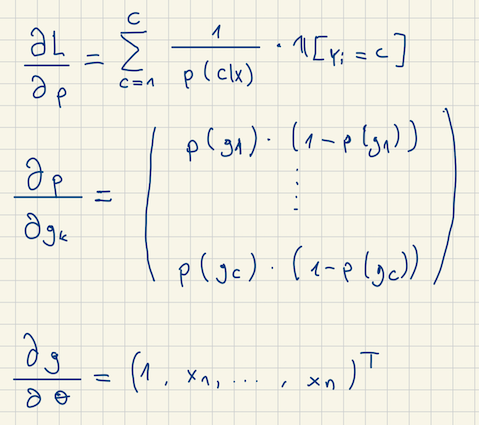

In [163]:
from IPython.display import Image
Image(filename='formulas.png') 

In [164]:
def onehot_scratch(labels, num_classes):
    labels = np.asarray(labels)

    # Determine the number of classes if not provided
    if num_classes is None:
        num_classes = np.max(labels) + 1

    # Create an array of zeros with shape (number of samples, number of classes)
    one_hot = np.zeros((labels.size, num_classes))

    # Set the appropriate indices to 1
    one_hot[np.arange(labels.size), labels] = 1

    return one_hot

In [165]:
def softmax_scratch(logits):
    #stabilization
    logits -=np.max(logits, axis=1, keepdims=True)    
    sm = (np.exp(logits) / np.sum(np.exp(logits),axis=1, keepdims=True)) # softmax formula
    return sm
    

In [166]:
def loss_softmax(y, pred):
    epsilon=1e-12 # constant to prevent log(0)
    pred = np.clip(pred, epsilon, 1. - epsilon)
    N = pred.shape[0]
    ce = -np.sum(y*np.log(pred+1e-9))/N # using formula from sheet
    return ce

Final accuracy on test dataset:  0.9644444444444444


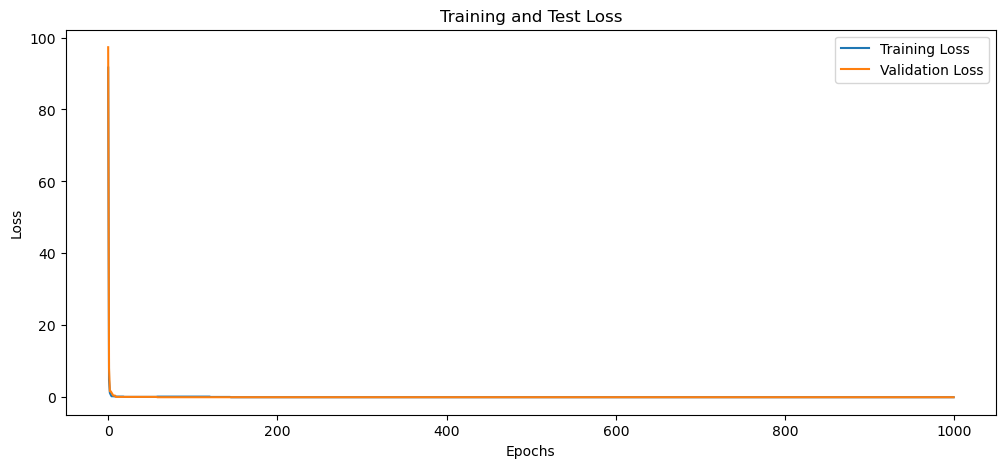

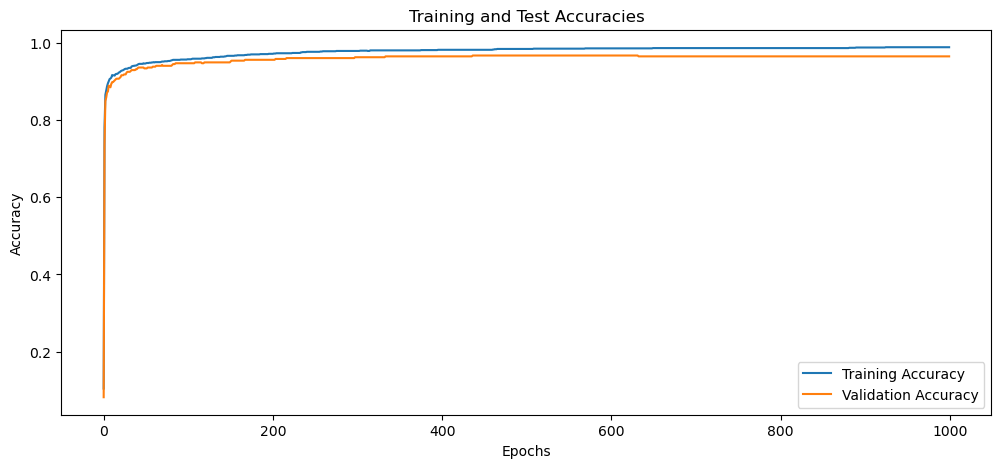

In [167]:
#load dataset
data = load_digits()
x, y = (data.images / 16.0).reshape(-1, 8 * 8), data.target
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, shuffle=True, random_state=0)

#initialize parameters
weights = np.ones((1,10,xtrain.shape[1])) #np.random.normal(0,1,size=(1,10,x.shape[1]))
weights = np.reshape(weights, (64, 10))
bias = np.zeros((1,10))

# create onehot
num_classes = len(np.unique(data.target))
one_hot_encoding = onehot_scratch(ytrain, num_classes)


lr =0.001 # learning rate
num_iterations = 1000
#Storing information for plotting in each iteration
accuracies_train = []
losses_train = []
accuracies_test = []
losses_test = []

for i in range(num_iterations):
    
    #TRAINING DATASET calculations
    #compute raw scores
    scores_train = np.dot(xtrain,weights) + bias
    # this is the prediction
    probability_train = softmax_scratch(scores_train)
    # highest probability class label or final prediction
    pred_label_train = np.argmax(probability_train,axis=1)

    loss_train = loss_softmax(ytrain,pred_label_train)
    losses_train.append(loss_train)
    ###

    #TEST DATASET calculations
    scores = np.dot(xtest,weights) + bias
    # this is the probability
    probability = softmax_scratch(scores)
    # highest probability class label or final prediction
    pred_label_test = np.argmax(probability,axis=1)
    ##loss on test prediction and test data
    loss = loss_softmax(ytest,pred_label_test)
    losses_test.append(loss)
    #accuracy on test prediction and test data
    accuracy = np.mean(pred_label_test == ytest)
    accuracies_test.append(accuracy)
    ###
    
    #gradients updated based on xtrain
    gradient_weights = np.dot(xtrain.T,(probability_train - one_hot_encoding))
    gradient_bias = np.mean(probability_train - one_hot_encoding,axis=0)

    #accuracy on training predictions and training data
    accuracy = np.mean(pred_label_train == ytrain)
    accuracies_train.append(accuracy)
    
    #optimization
    weights -= lr * gradient_weights
    bias -= lr * gradient_bias

# Plotting

print('Final accuracy on test dataset: ', accuracies_test[-1])

# Plotting
plt.figure(figsize=(12, 5))

plt.plot(losses_train, label='Training Loss')
plt.plot(losses_test, label='Validation Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.figure(figsize=(12, 5))

plt.plot(accuracies_train, label='Training Accuracy')
plt.plot(accuracies_test, label='Validation Accuracy')
plt.title('Training and Test Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
